In [25]:
import torch


path_prefix = "../../experiments_full_16_09_2025"

all_dataset_names = [
    "picnn_fnlvqr_glasses",
    "picnn_fnlvqr_star",
    "picnn_fnlvqr_banana",
    "fnlvqr_glasses",
    "fnlvqr_star",
    "fnlvqr_banana",
    "funnel_2",
    "funnel_4",
    "funnel_6",
    "funnel_8",
    "funnel_10",
    "funnel_12",
    "funnel_14",
    "funnel_16"
]

funnel_dataset_names = [
    "funnel_2",
    "funnel_4",
    "funnel_6",
    "funnel_8",
    "funnel_10",
    "funnel_12",
    "funnel_14",
    "funnel_16"
]

not_funnel_dataset_names = list(set(all_dataset_names) - set(funnel_dataset_names))


dataset_names = funnel_dataset_names
metric_names = [
    "Y_wasserstein2",
    "Y_sliced_wasserstein2",
    "Y_kde_kl_divergence",
    "Y_kde_l1_divergence",
    "U_wasserstein2",
    "U_sliced_wasserstein2",
    "U_kde_kl_divergence",
    "U_kde_l1_divergence",

    "Y|X_wasserstein2",
    "Y|X_sliced_wasserstein2",
    "Y|X_kde_kl_divergence",
    "Y|X_kde_l1_divergence",
    "U|X_wasserstein2",
    "U|X_sliced_wasserstein2",
    "U|X_kde_kl_divergence",
    "U|X_kde_l1_divergence",

    "YX_wasserstein2",
    "YX_sliced_wasserstein2",
    "YX_kde_kl_divergence",
    "YX_kde_l1_divergence",
    "UX_wasserstein2",
    "UX_sliced_wasserstein2",
    "UX_kde_kl_divergence",
    "UX_kde_l1_divergence",

    "Q^(-1)(Y,X)_uv_l2",
    "Q(U,X)_uv_l2",
]

dataset_name_to_pretty_name = {
    "picnn_fnlvqr_glasses":"Convex Glasses",
    "picnn_fnlvqr_star":"Convex Star",
    "picnn_fnlvqr_banana":"Convex Banana",
    "fnlvqr_glasses":"Glasses",
    "fnlvqr_star":"Star",
    "fnlvqr_banana":"Banana",
    "funnel_1":"$RR^{1}$",
    "funnel_2":"$RR^{2}$",
    "funnel_4":"$RR^{4}$",
    "funnel_6":"$RR^{6}$",
    "funnel_8":"$RR^{8}$",
    "funnel_10":"$RR^{10}$",
    "funnel_12":"$RR^{12}$",
    "funnel_14":"$RR^{14}$",
    "funnel_16":"$RR^{16}$",
}

metric_name_to_pretty_name = {
    "Y_wasserstein2":f"Wasserstein $F_{{Y}}$",
    "Y_sliced_wasserstein2":"Sliced Wasserstein $F_{{Y}}$",
    "Y_kde_kl_divergence":"Kernel Density Estimate KL $F_{{Y}}$",
    "Y_kde_l1_divergence":"Kernel Density Estimate KL L1 $F_{{Y}}$",
    "U_wasserstein2":"Wasserstein $F_{{U}}$",
    "U_sliced_wasserstein2":"Sliced Wasserstein $F_{{U}}$",
    "U_kde_kl_divergence":"Kernel Density Estimate KL $F_{{U}}$",
    "U_kde_l1_divergence":"Kernel Density Estimate L1 $F_{{U}}$",

    "Y|X_wasserstein2":"Wasserstein $F_{{Y|X}}$",
    "Y|X_sliced_wasserstein2":"Sliced Wasserstein $F_{{Y|X}}$",
    "Y|X_kde_kl_divergence":"Kernel Density Estimate KL $F_{{Y|X}}$",
    "Y|X_kde_l1_divergence":"Kernel Density Estimate L1 $F_{{Y|X}}$",

    "U|X_wasserstein2":"Wasserstein $F_{{U|X}}$",
    "U|X_sliced_wasserstein2":"Sliced Wasserstein $F_{{U|X}}$",
    "U|X_kde_kl_divergence":"Kernel Density Estimate KL $F_{{U|X}}$",
    "U|X_kde_l1_divergence":"Kernel Density Estimate L1 $F_{{U|X}}$",


    "YX_wasserstein2":"Wasserstein $F_{{(Y, X)}}$",
    "YX_sliced_wasserstein2":"Sliced Wasserstein $F_{{(Y, X)}}$",
    "YX_kde_kl_divergence":"Kernel Density Estimate KL $F_{{(Y, X)}}$",
    "YX_kde_l1_divergence":"Kernel Density Estimate L1 $F_{{(Y, X)}}$",

    "UX_wasserstein2":"Wasserstein $F_{{(U, X)}}$",
    "UX_sliced_wasserstein2":"Sliced Wasserstein $F_{{(U, X)}}$",
    "UX_kde_kl_divergence":f"Kernel Density Estimate KL $F_{{(U,X)}}$",
    "UX_kde_l1_divergence":"Kernel Density Estimate L1 $F_{{(U, X)}}$",

    "Q^(-1)(Y,X)_uv_l2":f"Unexplained Variance of $Q^{{(-1)}}(Y,X)$",
    "Q(U,X)_uv_l2":"Unexplained Variance of $Q(U,X)$"
}


model_names = [
    "E-NQR",# "EntropicNeuralQuantileRegression",
    "C-NQR$_u$",# "NeuralQuantileRegressionU",
    "C-NQR$_y$",# "NeuralQuantileRegressionY",
    "CA-NQR$_u$",# "AmortizedNeuralQuantileRegressionU",
    "CA-NQR$_y$",# "AmortizedNeuralQuantileRegressionY",
    "CPF",# "ConvexPotentialFlow",
    # "FN-VQR",# "Fast Non Linear Vector Quantile Regression",
    # "VQR"# "Linear Vector Quantile Regression",
]

model_name_to_idx = {
    model_name:idx
    for idx, model_name  in enumerate(model_names)
}

model_name_to_folder_name = {
    "E-NQR":"entropic_neural_quantile_regression",
    "C-NQR$_u$":"neural_quantile_regression_u",
    "C-NQR$_y$":"neural_quantile_regression_y",
    "CA-NQR$_u$":"amortized_neural_quantile_regression_u",
    "CA-NQR$_y$":"amortized_neural_quantile_regression_y",
    "CPF":"convex_potential_flow",
    "FN-VQR":"fast_non_linear_vector_quantile_regression",
    "VQR":"linear_quantile_regression",
}

dataset_name_to_model_name_to_metric_name_to_mean_and_std = {
    dataset_name:{
        model_name:{
            metric_name:{   
                "mean":None,
                "std":None,
                "samples":None,
            } for metric_name in metric_names
        } for model_name in model_names
    } for dataset_name in dataset_names
}

In [26]:
for dataset_name, model_name_to_metric_name_to_mean_and_std in dataset_name_to_model_name_to_metric_name_to_mean_and_std.items():
    for model_name, metric_name_to_mean_and_std in model_name_to_metric_name_to_mean_and_std.items():
        metric_dict = torch.load(f"{path_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")
        for metric_name in metric_name_to_mean_and_std.keys():
            metric_stack = metric_dict[metric_name]

            if not metric_stack:
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["mean"] = 0.
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["std"] = 0.
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["samples"] = torch.tensor([0.])
                continue

            metric_tensor = torch.stack(metric_stack)
            metric_mean = metric_tensor.mean().item()
            metric_std = metric_tensor.std().item()
            
            dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["mean"] = metric_mean
            dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["std"] = metric_std
            dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["samples"] = metric_tensor

/var/folders/rt/72m8hlc54ms0bkqzq024nm480000gp/T/ipykernel_81862/3853694275.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i * ncols + (ncols - 1)].legend(markerscale=2, bbox_to_anchor=[1.01, 1.01], loc='upper left')


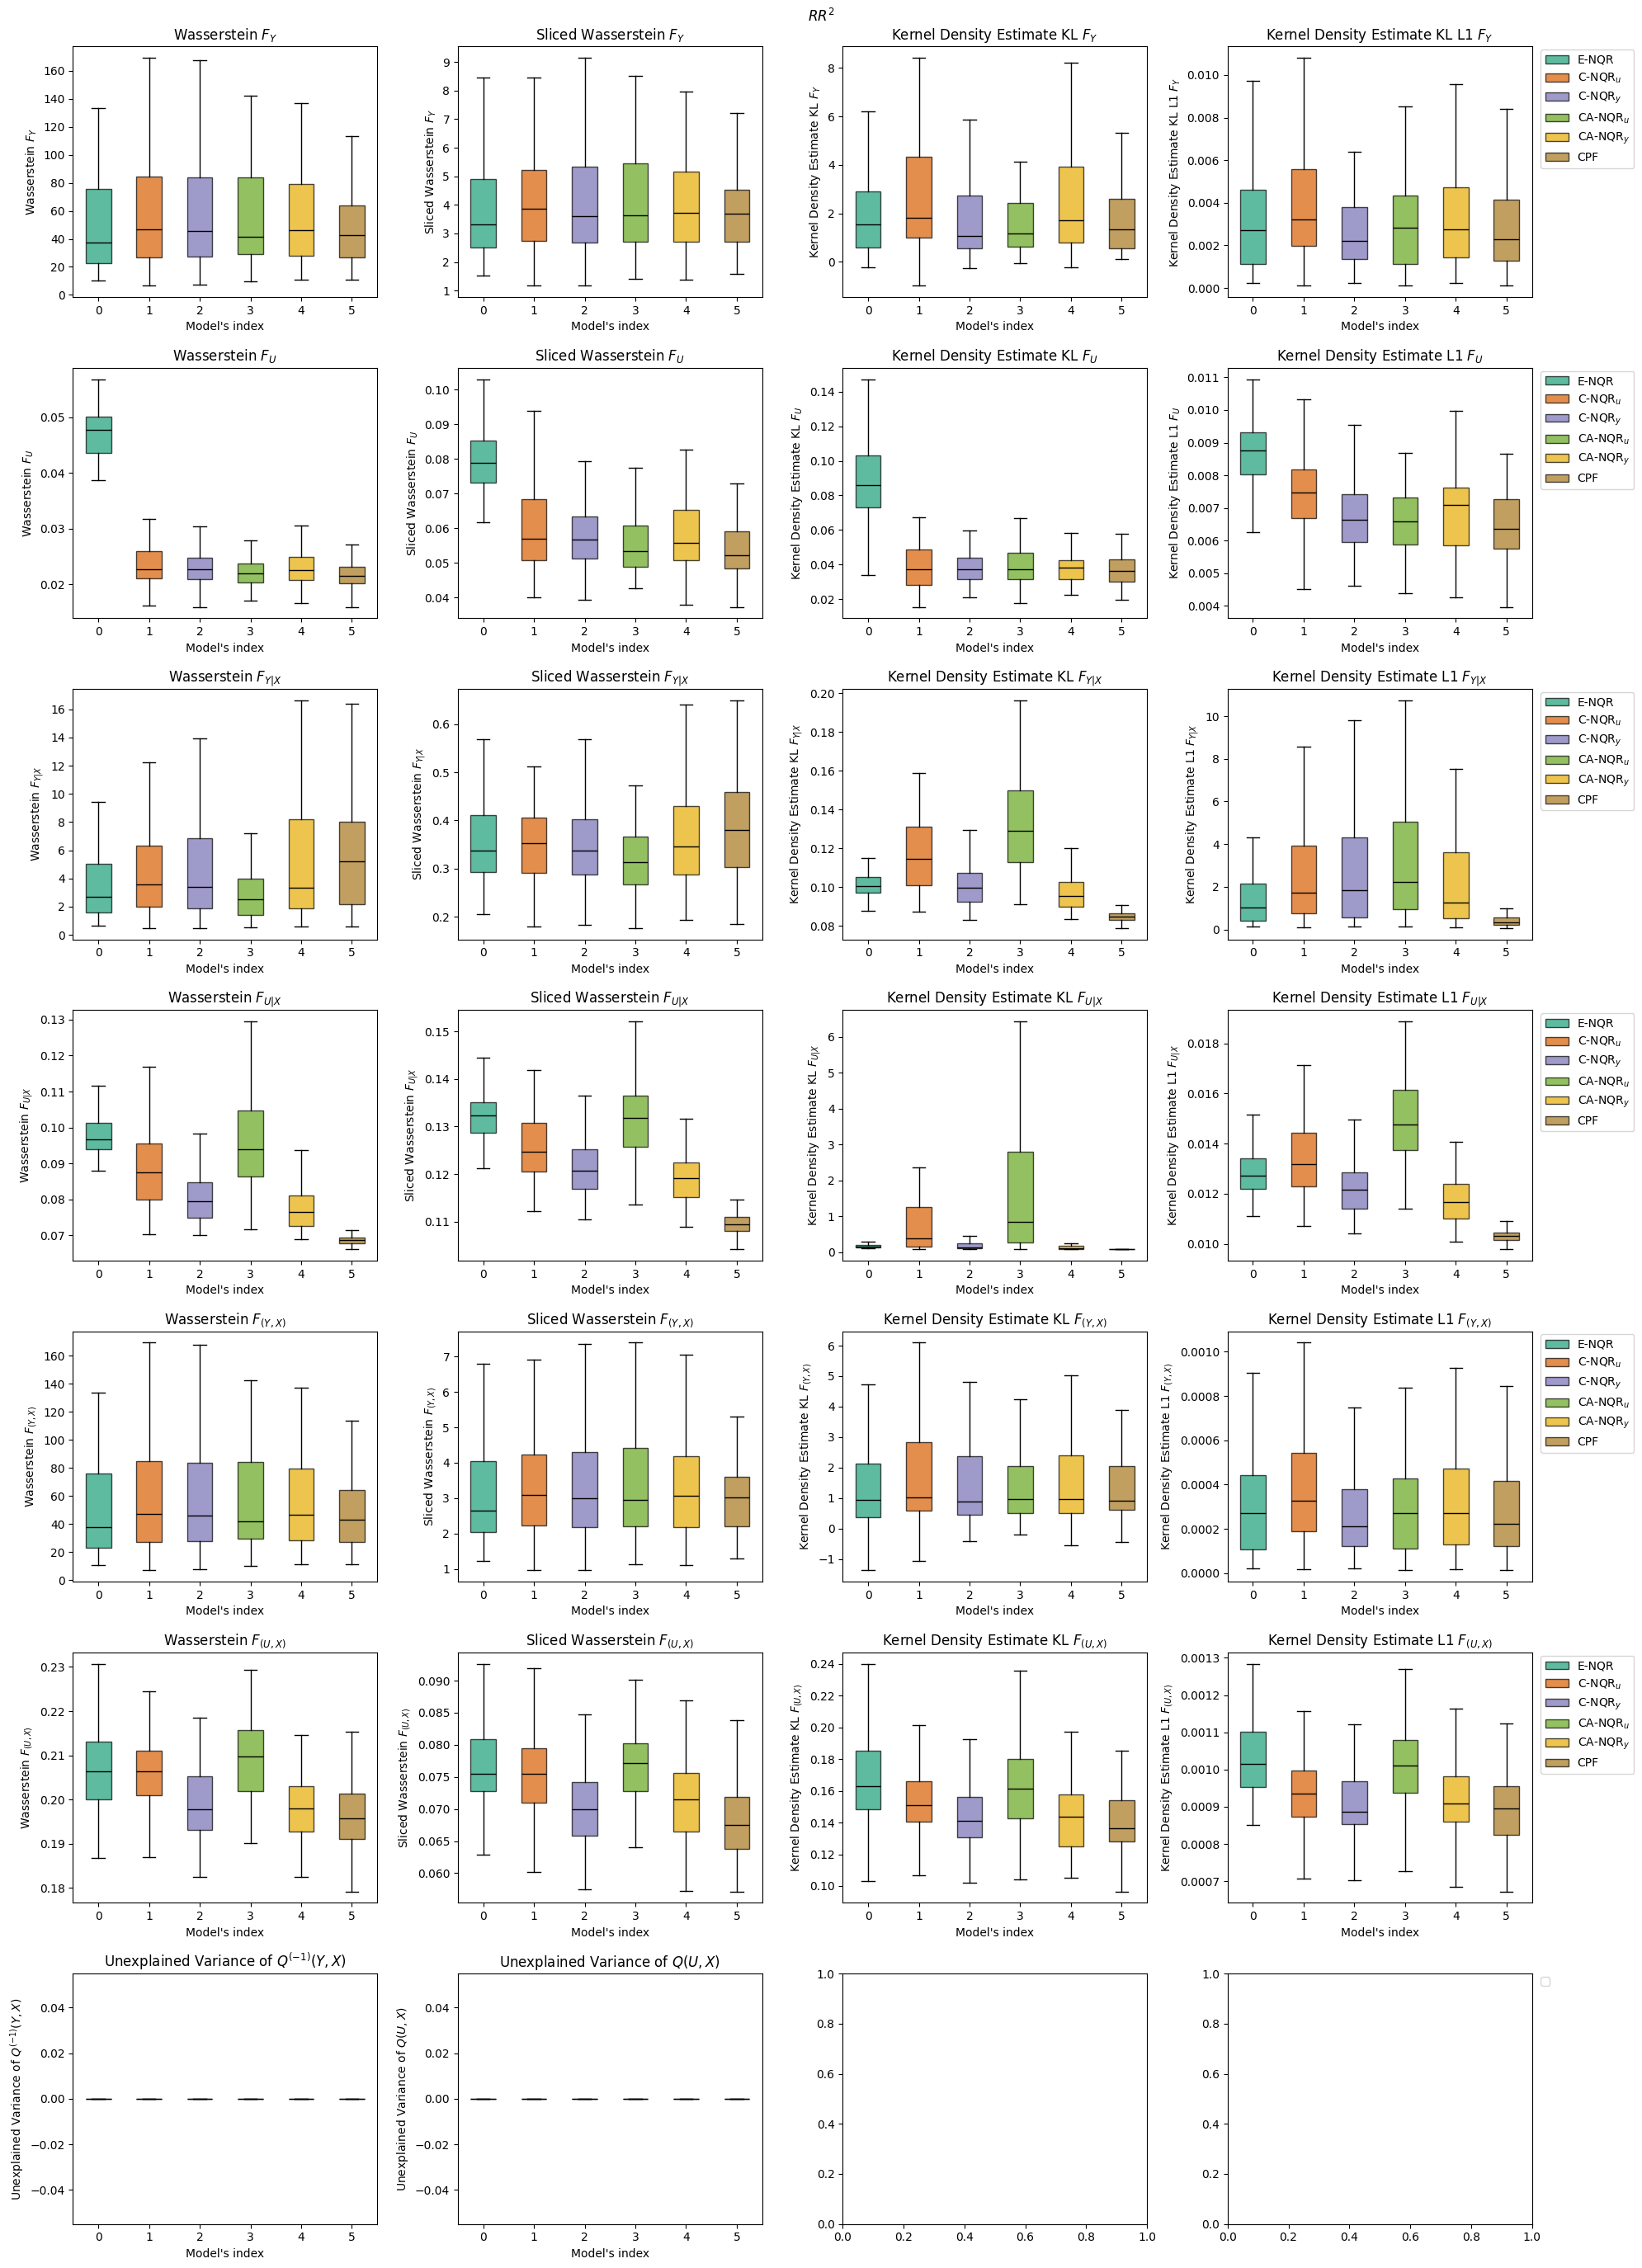

In [27]:
import matplotlib.pyplot as plt
import matplotlib
import math

dataset_name = 'funnel_2'


colors = matplotlib.colormaps['Dark2']
model_name_to_metric_name_to_mean_and_std = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name]
number_of_metrics = len(metric_names)

ncols = 4
nrows = math.ceil(number_of_metrics / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
fig.suptitle(dataset_name_to_pretty_name[dataset_name])

axs = axs.flatten()
metric_name_to_ax = {metric_name: ax for metric_name, ax in zip(metric_names, axs)}

for metric_name, ax in metric_name_to_ax.items():
    ax.set_title(metric_name_to_pretty_name[metric_name])
    ax.set_xlabel("Model's index")
    ax.set_ylabel(metric_name_to_pretty_name[metric_name])

for model_name, metric_name_to_mean_and_std in model_name_to_metric_name_to_mean_and_std.items():
    for metric_name, ax in metric_name_to_ax.items():
        mean, std, samples = metric_name_to_mean_and_std[metric_name].values()
        if mean is not None and std is not None:
            boxplot_color = colors(model_name_to_idx[model_name] / len(model_name_to_idx))
            samples = samples[~samples.isnan()]
            ax.boxplot(
                samples,
                positions=[model_name_to_idx[model_name]],
                widths=0.5,
                patch_artist=True,
                boxprops=dict(facecolor=boxplot_color, alpha=0.7),
                medianprops=dict(color="black"),
                showfliers=False,
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                label=model_name
            )

for i in range(nrows):
    axs[i * ncols + (ncols - 1)].legend(markerscale=2, bbox_to_anchor=[1.01, 1.01], loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()

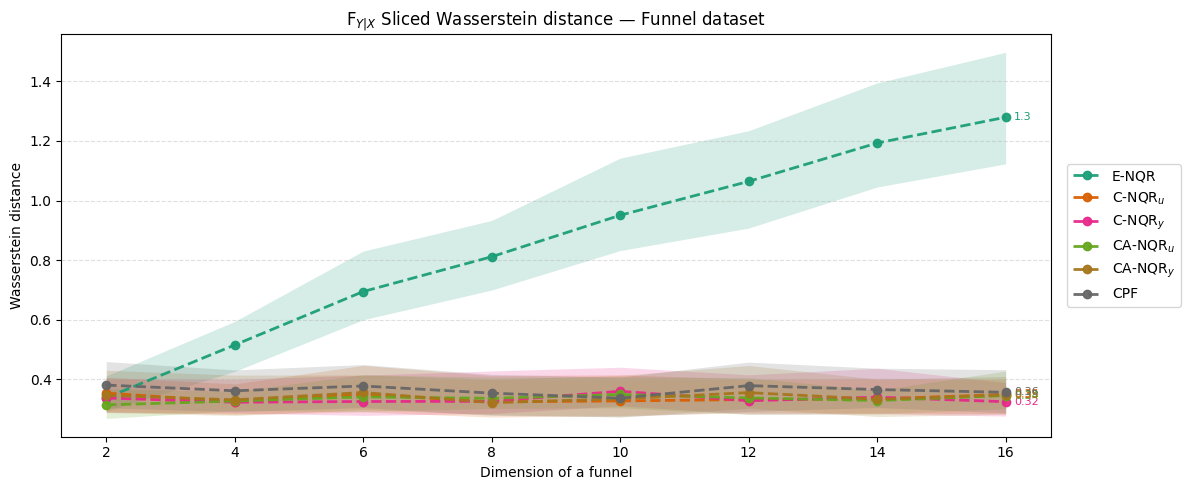

In [58]:
import matplotlib.pyplot as plt
import matplotlib
import torch
from typing import Tuple

def safe_quantiles(samples: torch.Tensor) -> Tuple[float, float, float]:
    """Return (median, q25, q75) for a 1D torch tensor, handling NaNs and empty arrays."""
    if samples is None:
        return float('nan'), float('nan'), float('nan')
    samples = samples[~torch.isnan(samples)]
    if samples.numel() == 0:
        return float('nan'), float('nan'), float('nan')
    
    q25 = torch.quantile(samples, 0.25).item()
    med = torch.quantile(samples, 0.5).item()
    q75 = torch.quantile(samples, 0.75).item()
    
    return med, q25, q75

def plot_funnel_wasserstein(
    model_names,
    dataset_name_to_model_name_to_metric_name_to_mean_and_std,
    dataset_indexes=[2,4,6,8,10,12,14,16],
    metric_name="Y|X_sliced_wasserstein2",
    figsize=(12,5),
    cmap_name='Dark2'
):
    model_name_to_dataset_index_to_samples = {
        model_name: {di: None for di in dataset_indexes}
        for model_name in model_names
    }

    for model_name, dataset_index_to_samples in model_name_to_dataset_index_to_samples.items():
        for dataset_index in dataset_index_to_samples.keys():
            dataset_name = f'funnel_{dataset_index}'
            mean_and_std = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]
            if isinstance(mean_and_std, dict):
                samples = mean_and_std.get('samples')
            else:
                if isinstance(mean_and_std, (tuple, list)) and len(mean_and_std) >= 3:
                    samples = mean_and_std[2]
                else:
                    samples = mean_and_std
            model_name_to_dataset_index_to_samples[model_name][dataset_index] = samples

    plt.figure(figsize=figsize)
    plt.title(r"F$_{Y|X}$ Sliced Wasserstein distance — Funnel dataset")
    plt.ylabel("Wasserstein distance")
    plt.xlabel("Dimension of a funnel")

    cmap = matplotlib.colormaps[cmap_name]
    for k, (model_name, dataset_index_to_samples) in enumerate(model_name_to_dataset_index_to_samples.items()):
        xs, medians, q25s, q75s = [], [], [], []

        for dataset_index in sorted(dataset_index_to_samples.keys()):
            samples = dataset_index_to_samples[dataset_index]
            if isinstance(samples, list):
                samples = torch.tensor(samples)

            med, q25, q75 = safe_quantiles(samples)
            xs.append(dataset_index)
            medians.append(med)
            q25s.append(q25)
            q75s.append(q75)

        color = cmap(k / max(1, len(model_names) - 1))

        plt.plot(xs, medians, label=model_name, color=color,
                 linestyle='--', marker='o', markersize=6, linewidth=2, alpha=0.95)
        plt.fill_between(xs, q25s, q75s, color=color, alpha=0.18, linewidth=0)

        if len(xs) > 0 and not (torch.isnan(torch.tensor(medians[-1]))):
            plt.annotate(f"{medians[-1]:.2g}", xy=(xs[-1], medians[-1]),
                         xytext=(6, 0), textcoords='offset points', va='center', fontsize=8, color=color)

    plt.xticks(sorted(dataset_indexes))
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    plt.tight_layout()
    plt.show()

plot_funnel_wasserstein(model_names, dataset_name_to_model_name_to_metric_name_to_mean_and_std)


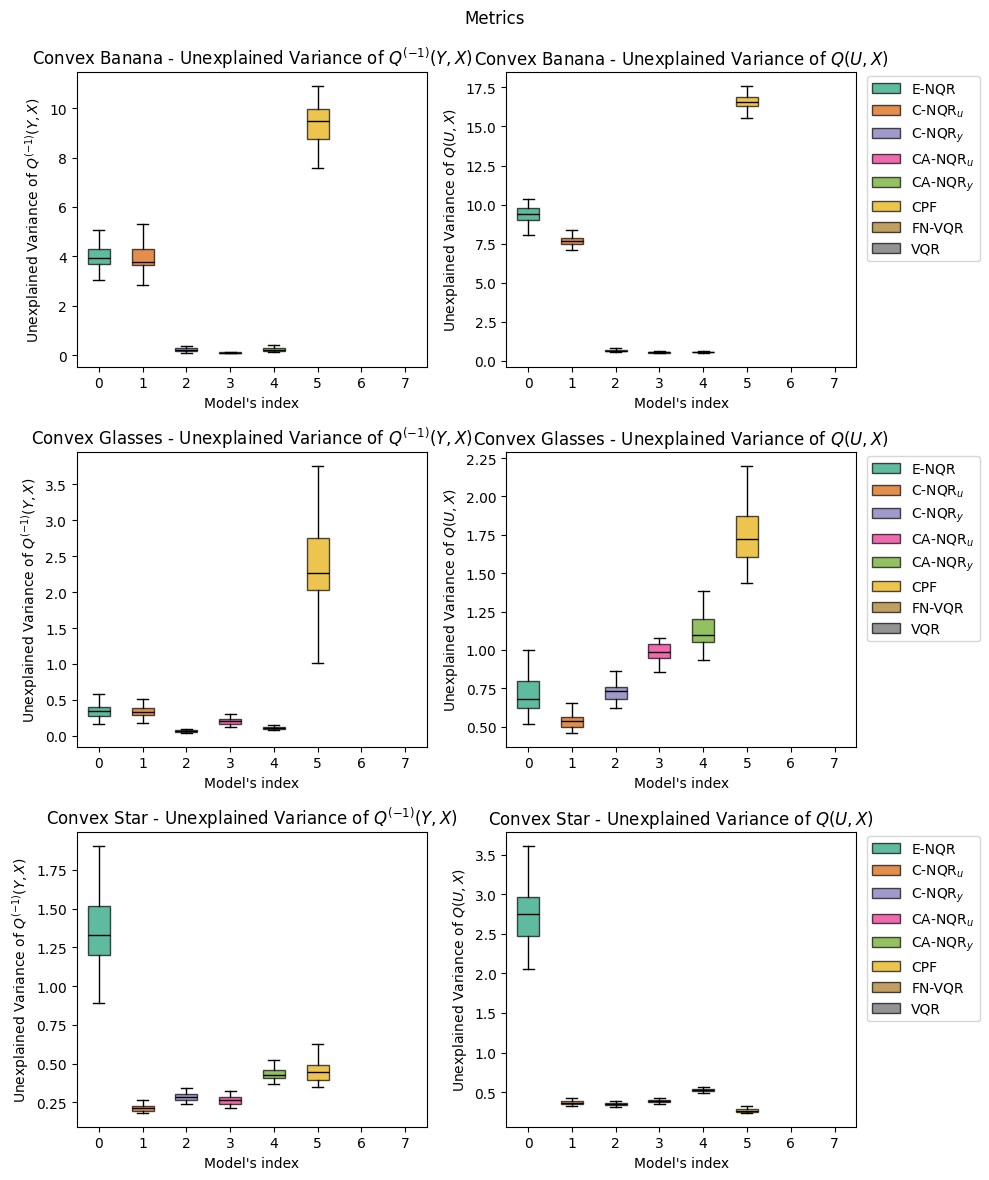

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import math

metric_names_to_plot = [
    "Q^(-1)(Y,X)_uv_l2",
    "Q(U,X)_uv_l2",
]
colors = matplotlib.colormaps['Dark2']
number_of_metrics = len(metric_names_to_plot)

ncols = len(metric_names_to_plot)
nrows = len(dataset_names)

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
fig.suptitle("Metrics")

axs = axs.flatten()

dataset_name_and_metric_name = [
    (dataset_name, metric_name)
    for dataset_name in dataset_names
    for metric_name in metric_names_to_plot
]

dataset_name_and_metric_name_to_ax = {(dataset_name, metric_name): ax for (dataset_name, metric_name), ax in zip(dataset_name_and_metric_name, axs)}

for (dataset_name, metric_name), ax in dataset_name_and_metric_name_to_ax.items():
    ax.set_title(f"{dataset_name_to_pretty_name[dataset_name]} - {metric_name_to_pretty_name[metric_name]}")
    ax.set_xlabel("Model's index")
    ax.set_ylabel(metric_name_to_pretty_name[metric_name])

for (dataset_name, metric_name), ax in dataset_name_and_metric_name_to_ax.items():
    for model_name, metric_name_to_mean_and_std in dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name].items():

        mean, std, samples = metric_name_to_mean_and_std[metric_name].values()
        if mean is not None and std is not None:
            boxplot_color = colors(model_name_to_idx[model_name] / len(model_name_to_idx))
            samples = samples[~samples.isnan()]
            ax.boxplot(
                samples,
                positions=[model_name_to_idx[model_name]],
                widths=0.5,
                patch_artist=True,
                boxprops=dict(facecolor=boxplot_color, alpha=0.7),
                medianprops=dict(color="black"),
                showfliers=False,
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                label=model_name
            )

for i in range(nrows):
    axs[i * ncols + (ncols - 1)].legend(markerscale=2, bbox_to_anchor=[1.01, 1.01], loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()

In [ ]:
import numpy as np
import torch  # keep if your samples are torch tensors

metric_name_to_print = "Y|X_sliced_wasserstein2"

caption = "Sliced wasserstein-2 distance"
label = None
metric_pretty = metric_name_to_pretty_name.get(metric_name_to_print, metric_name_to_print) if metric_name_to_pretty_name else metric_name_to_print
decimal_precision = 3
bold_k = 2


def latex_escape(s: str) -> str:
    """Very small LaTeX-escape helper for underscores and percent signs (common culprits)."""
    if not isinstance(s, str):
        return str(s)
    return s.replace("\\", r"\\").replace("_", r"\_").replace("%", r"\%")


n_models = len(model_names)
# one median column per model, with vertical separators between model groups
col_spec = "l|" + ("c|" * n_models)  # e.g. l|c|c|c|
metric_title = latex_escape(metric_pretty)

rows = []
for dataset_name in dataset_names:
    dataset_pretty = latex_escape(dataset_name_to_pretty_name.get(dataset_name, dataset_name))

    medians_for_ranking = []
    medians_per_model = []

    for model_name in model_names:
        metric_dict = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][
            metric_name_to_print
        ]
        values = metric_dict.get("samples")

        if values is None:
            medians_per_model.append(None)
            medians_for_ranking.append(float("inf"))
            continue

        # convert torch -> numpy if necessary, and remove NaNs
        if isinstance(values, torch.Tensor):
            values = values.detach().cpu().numpy()

        values = np.array(values)
        if values.size == 0:
            medians_per_model.append(None)
            medians_for_ranking.append(float("inf"))
            continue

        values = values[~np.isnan(values)]
        if values.size == 0:
            medians_per_model.append(None)
            medians_for_ranking.append(float("inf"))
            continue

        # optional trimming of extremes (like original): drop first/last 5 if enough points
        vals_sorted = np.sort(values)
        if vals_sorted.size > 10:
            trimmed = vals_sorted[5:-5]
        else:
            trimmed = vals_sorted

        median = float(np.median(trimmed))
        medians_per_model.append(median)
        medians_for_ranking.append(median)

    # determine smallest medians to bold
    smallest_indices = sorted(range(len(medians_for_ranking)), key=lambda i: medians_for_ranking[i])[:bold_k]

    # build one row for this dataset with one median column per model
    row_cells = [dataset_pretty]
    for i, median in enumerate(medians_per_model):
        if median is None:
            row_cells.append("--")
        else:
            median_str = f"{median:.{decimal_precision}f}"
            if i in smallest_indices and medians_for_ranking[i] != float("inf"):
                median_cell = f"$\\mathbf{{{median_str}}}$"
            else:
                median_cell = f"${median_str}$"
            row_cells.append(median_cell)

    rows.append(" & ".join(row_cells) + " \\\\")

# Build full table: top-left corner intentionally left blank
header_line1 = " "  # empty corner cell
header_line1 += " & " + " & ".join(
    f"\\multicolumn{{1}}{{c|}}{{{latex_escape(m)}}}" for m in model_names
) + " \\\\"

header_line2 = " "  # empty first cell

table_lines = []
table_lines.append("\\begin{table}[t!]")
table_lines.append("\\centering")
if caption:
    table_lines.append(f"\\caption{{{latex_escape(caption)}}}")
table_lines.append("\\resizebox{\\textwidth}{!}{%")
table_lines.append("\\begin{tabular}{" + col_spec + "}")
table_lines.append(header_line1)
table_lines.append(header_line2)
table_lines.append("\\midrule")
table_lines.extend(rows)
table_lines.append("\\bottomrule")
table_lines.append("\\end{tabular}%")
table_lines.append("}")  # end resizebox
if label:
    table_lines.append(f"\\label{{{latex_escape(label)}}}")
table_lines.append("\\end{table}")

print("\n".join(table_lines))


\begin{table}[t!]
\centering
\caption{Sliced wasserstein-2 distance}
\resizebox{\textwidth}{!}{%
\begin{tabular}{l|c|c|c|c|c|c|c|c|}
  & \multicolumn{1}{c|}{E-NQR} & \multicolumn{1}{c|}{C-NQR$\_u$} & \multicolumn{1}{c|}{C-NQR$\_y$} & \multicolumn{1}{c|}{CA-NQR$\_u$} & \multicolumn{1}{c|}{CA-NQR$\_y$} & \multicolumn{1}{c|}{CPF} & \multicolumn{1}{c|}{FN-VQR} & \multicolumn{1}{c|}{VQR} \\
 
\midrule
Convex Banana & $0.103$ & $0.101$ & $0.071$ & $\mathbf{0.070}$ & $0.070$ & $\mathbf{0.069}$ & $0.392$ & $0.389$ \\
Banana & $0.111$ & $0.072$ & $0.073$ & $0.073$ & $\mathbf{0.072}$ & $\mathbf{0.069}$ & $0.420$ & $0.398$ \\
Star & $0.197$ & $\mathbf{0.184}$ & $0.184$ & $\mathbf{0.182}$ & $0.197$ & $0.247$ & $0.303$ & $0.273$ \\
Glasses & $\mathbf{0.748}$ & $0.785$ & $0.812$ & $\mathbf{0.771}$ & $0.810$ & $1.687$ & $1.990$ & $2.079$ \\
Convex Star & $0.200$ & $\mathbf{0.182}$ & $0.184$ & $\mathbf{0.182}$ & $0.191$ & $0.191$ & $0.244$ & $0.261$ \\
Convex Glasses & $\mathbf{0.650}$ & $\mathbf{0.65

In [12]:
import numpy as np

metric_name_to_print = "Y|X_sliced_wasserstein2"

caption = "Sliced wasserstein-2 distance"
label = None
metric_pretty = metric_name_to_pretty_name.get(metric_name_to_print, metric_name_to_print) if metric_name_to_pretty_name else metric_name_to_print
decimal_precision = 2
bold_k = 2


def latex_escape(s: str) -> str:
    """Very small LaTeX-escape helper for underscores and percent signs (common culprits)."""
    if not isinstance(s, str):
        return str(s)
    return s.replace("\\", r"\\").replace("_", r"\_").replace("%", r"\%")


n_models = len(model_names)
col_spec = "l" + "c" * n_models
metric_title = latex_escape(metric_pretty)

rows = []
for dataset_name in dataset_names:
    row_cells = [latex_escape(dataset_name_to_pretty_name.get(dataset_name, dataset_name))]
    values_for_ranking = []
    formatted_cells = []

    for model_name in model_names:
        metric_dict = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][
            metric_name_to_print
        ]
        values = metric_dict.get("samples")
        values = values[~values.isnan()]
        values_sorted = torch.sort(values)[0]
        values_sorted = values_sorted[5:]
        values_sorted = values_sorted[:-5]

        if values is None or len(values) == 0:
            formatted = "--"
            values_for_ranking.append(float("inf"))
        else:
            values = np.array(values)
            median = np.median(values)
            q25, q75 = np.percentile(values, [25, 75])

            fmt = f"{median:.{decimal_precision}f} \\, ( {q25:.{decimal_precision}f}, {q75:.{decimal_precision}f} )"
            formatted = fmt
            values_for_ranking.append(median)

        formatted_cells.append(formatted)

    smallest_indices = sorted(range(len(values_for_ranking)), key=lambda i: values_for_ranking[i])[:bold_k]

    for i, cell in enumerate(formatted_cells):
        if cell == "--":
            wrapped = cell
        else:
            if i in smallest_indices and values_for_ranking[i] != float("inf"):
                wrapped = f"$\\mathbf{{{cell}}}$"
            else:
                wrapped = f"${cell}$"
        formatted_cells[i] = wrapped

    row_cells.extend(formatted_cells)
    rows.append(" & ".join(row_cells) + " \\\\")

# Build full table
header_models = " & ".join(latex_escape(m) for m in model_names)

table_lines = []
table_lines.append("\\begin{table}[t!]")
table_lines.append("\\centering")
if caption:
    table_lines.append(f"\\caption{{{latex_escape(caption)}}}")
table_lines.append("\\resizebox{\\textwidth}{!}{%")
table_lines.append("\\begin{tabular}{" + col_spec + "}")
table_lines.append("Dataset & " + header_models + " \\\\")
table_lines.append("\\midrule")
table_lines.extend(rows)
table_lines.append("\\bottomrule")
table_lines.append("\\end{tabular}%")
table_lines.append("}")  # end resizebox
if label:
    table_lines.append(f"\\label{{{latex_escape(label)}}}")
table_lines.append("\\end{table}")

print("\n".join(table_lines))


\begin{table}[t!]
\centering
\caption{Sliced wasserstein-2 distance}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lcccccccc}
Dataset & E-NQR & C-NQR$\_u$ & C-NQR$\_y$ & CA-NQR$\_u$ & CA-NQR$\_y$ & CPF & FN-VQR & VQR \\
\midrule
Convex Banana & $0.10 \, ( 0.10, 0.11 )$ & $0.10 \, ( 0.10, 0.10 )$ & $0.07 \, ( 0.07, 0.07 )$ & $\mathbf{0.07 \, ( 0.07, 0.07 )}$ & $0.07 \, ( 0.07, 0.07 )$ & $\mathbf{0.07 \, ( 0.07, 0.07 )}$ & $0.39 \, ( 0.38, 0.40 )$ & $0.39 \, ( 0.38, 0.40 )$ \\
Convex Glasses & $\mathbf{0.65 \, ( 0.60, 0.68 )}$ & $\mathbf{0.66 \, ( 0.61, 0.69 )}$ & $0.67 \, ( 0.63, 0.71 )$ & $0.66 \, ( 0.62, 0.68 )$ & $0.69 \, ( 0.64, 0.72 )$ & $0.76 \, ( 0.71, 0.79 )$ & $2.03 \, ( 1.99, 2.06 )$ & $2.05 \, ( 2.01, 2.09 )$ \\
Convex Star & $0.20 \, ( 0.20, 0.20 )$ & $\mathbf{0.18 \, ( 0.18, 0.18 )}$ & $0.18 \, ( 0.18, 0.19 )$ & $\mathbf{0.18 \, ( 0.18, 0.18 )}$ & $0.19 \, ( 0.19, 0.19 )$ & $0.19 \, ( 0.19, 0.19 )$ & $0.24 \, ( 0.24, 0.25 )$ & $0.26 \, ( 0.26, 0.26 )$ \\
\bottomrule
\end{tabu

/var/folders/rt/72m8hlc54ms0bkqzq024nm480000gp/T/ipykernel_81862/949822540.py:43: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  values = np.array(values)


In [3]:
from datasets import PICNN_FNLVQR_Glasses
from pushforward_operators import ConvexPotentialFlow
from metrics import percentage_of_unexplained_variance

model = ConvexPotentialFlow.load_class("../../experiments_full_16_09_2025/picnn_fnlvqr_glasses/convex_potential_flow/weights.pth")
dataset = PICNN_FNLVQR_Glasses({})
X_dataset, Y_dataset, U_dataset = dataset.sample_x_y_u(n_points=1000)
Y_approx = model.push_u_given_x(U_dataset, X_dataset)
U_approx = model.push_y_given_x(Y_dataset, X_dataset)

print(percentage_of_unexplained_variance(Y_dataset, Y_approx))
print(percentage_of_unexplained_variance(U_dataset, U_approx))

/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/convex_potential_flow/cpflows.py:215: UserWarning: brute force
  warnings.warn("brute force")


tensor(1.7894)
tensor(1.5611)


In [38]:
import torch


source_dataset_prefix = "../../experiments_full_16_09_2025_to_test"
target_dataset_prefix = "../../experiments_full_16_09_2025"
dataset_names = [
    "picnn_fnlvqr_glasses",
    "picnn_fnlvqr_star",
    "picnn_fnlvqr_banana",
]

metric_names = [
    "Q^(-1)(Y,X)_uv_l2",
    "Q(U,X)_uv_l2",
]

model_names = [
    "E-NQR",# "EntropicNeuralQuantileRegression",
    "C-NQR$_u$",# "NeuralQuantileRegressionU",
    "C-NQR$_y$",# "NeuralQuantileRegressionY",
    "CA-NQR$_u$",# "AmortizedNeuralQuantileRegressionU",
    "CA-NQR$_y$",# "AmortizedNeuralQuantileRegressionY",
    "CPF",# "ConvexPotentialFlow",
]

model_name_to_folder_name = {
    "E-NQR":"entropic_neural_quantile_regression",
    "C-NQR$_u$":"neural_quantile_regression_u",
    "C-NQR$_y$":"neural_quantile_regression_y",
    "CA-NQR$_u$":"amortized_neural_quantile_regression_u",
    "CA-NQR$_y$":"amortized_neural_quantile_regression_y",
    "CPF":"convex_potential_flow",
    "FN-VQR":"fast_non_linear_vector_quantile_regression",
    "VQR":"linear_quantile_regression",
}

for dataset_name in dataset_names:
    for metric_name in metric_names:
        for model_name in model_names:
            source_metrics = torch.load(f"{source_dataset_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")
            target_metrics = torch.load(f"{target_dataset_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")
            print(f"{dataset_name=}, {metric_name=}, {model_name=}")
            print(f"{source_metrics[metric_name]=}")
            print(f"{target_metrics[metric_name]=}")
            torch.save(target_metrics, f"{target_dataset_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics_old.pth")
            target_metrics[metric_name] = source_metrics[metric_name]
            torch.save(target_metrics, f"{target_dataset_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")
            print(f"{dataset_name=}, {metric_name=}, {model_name=}")
            print(f"{source_metrics[metric_name]=}")
            print(f"{target_metrics[metric_name]=}")
            print(target_metrics)
            print(">"*10)

dataset_name='picnn_fnlvqr_glasses', metric_name='Q^(-1)(Y,X)_uv_l2', model_name='E-NQR'
source_metrics[metric_name]=[tensor(0.1684, dtype=torch.float64), tensor(0.3986, dtype=torch.float64), tensor(0.4654, dtype=torch.float64), tensor(0.3583, dtype=torch.float64), tensor(0.3812, dtype=torch.float64), tensor(0.2304, dtype=torch.float64), tensor(0.2637, dtype=torch.float64), tensor(0.2264, dtype=torch.float64), tensor(0.6633, dtype=torch.float64), tensor(0.4280, dtype=torch.float64), tensor(0.2181, dtype=torch.float64), tensor(0.5017, dtype=torch.float64), tensor(0.4252, dtype=torch.float64), tensor(0.2971, dtype=torch.float64), tensor(0.4618, dtype=torch.float64), tensor(0.3857, dtype=torch.float64), tensor(0.3699, dtype=torch.float64), tensor(0.3726, dtype=torch.float64), tensor(0.4073, dtype=torch.float64), tensor(0.2582, dtype=torch.float64), tensor(0.3171, dtype=torch.float64), tensor(0.2913, dtype=torch.float64), tensor(0.3921, dtype=torch.float64), tensor(0.3588, dtype=torch.floa

In [91]:
discrete_model_names = [
    "FN-VQR",# "Fast Non Linear Vector Quantile Regression",
    "VQR"# "Linear Vector Quantile Regression",
]


dataset_name_to_discrete_model_name_to_metric_name_to_mean_and_std = {
    dataset_name:{
        model_name:{
            metric_name:{   
                "mean":None,
                "std":None,
                "samples":None,
            } for metric_name in metric_names
        } for model_name in discrete_model_names
    } for dataset_name in not_funnel_dataset_names
}

for dataset_name, model_name_to_metric_name_to_mean_and_std in dataset_name_to_discrete_model_name_to_metric_name_to_mean_and_std.items():
    for model_name, metric_name_to_mean_and_std in model_name_to_metric_name_to_mean_and_std.items():
        metric_dict = torch.load(f"{path_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")

        for metric_name in metric_name_to_mean_and_std.keys():
            if "U" in metric_name or "Q" in metric_name:
                metric_dict[metric_name] = [torch.tensor(torch.nan)]
                print(f"{metric_name=}, {metric_dict[metric_name]=}")
        
        torch.save(metric_dict, f"{path_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")
            # metric_stack = metric_dict[metric_name]
            # if not metric_stack:
            #     dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["mean"] = 0.
            #     dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["std"] = 0.
            #     dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["samples"] = torch.tensor([0.])
            #     continue
            # metric_tensor = torch.stack(metric_stack)
            # metric_mean = metric_tensor.mean().item()
            # metric_std = metric_tensor.std().item()
            
            # dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["mean"] = metric_mean
            # dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["std"] = metric_std
            # dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["samples"] = metric_tensor

metric_name='U_wasserstein2', metric_dict[metric_name]=[tensor(nan)]
metric_name='U_sliced_wasserstein2', metric_dict[metric_name]=[tensor(nan)]
metric_name='U_kde_kl_divergence', metric_dict[metric_name]=[tensor(nan)]
metric_name='U_kde_l1_divergence', metric_dict[metric_name]=[tensor(nan)]
metric_name='U|X_wasserstein2', metric_dict[metric_name]=[tensor(nan)]
metric_name='U|X_sliced_wasserstein2', metric_dict[metric_name]=[tensor(nan)]
metric_name='U|X_kde_kl_divergence', metric_dict[metric_name]=[tensor(nan)]
metric_name='U|X_kde_l1_divergence', metric_dict[metric_name]=[tensor(nan)]
metric_name='UX_wasserstein2', metric_dict[metric_name]=[tensor(nan)]
metric_name='UX_sliced_wasserstein2', metric_dict[metric_name]=[tensor(nan)]
metric_name='UX_kde_kl_divergence', metric_dict[metric_name]=[tensor(nan)]
metric_name='UX_kde_l1_divergence', metric_dict[metric_name]=[tensor(nan)]
metric_name='Q^(-1)(Y,X)_uv_l2', metric_dict[metric_name]=[tensor(nan)]
metric_name='Q(U,X)_uv_l2', metric_di